**Steps:**

1.   Load the data
2.   Data visualization
3.   Clean the data by:
        - Remove unnecessary columns
        - make means of the evaluation scores
        - identify, count and change NAs
        - change categorical variables into numerical ones
4. Unite the datasets by column
5. Check again if data needs to be removed
6. Divide data into X_train, y_train, X_test, y_test
7. Do some feature extraction (more details later)
8. Train 3 machine learning models
9. Evaluate the models
10. Choose the best model and perform hyperparameter tuning if necessary to increase its performance
11. Extract the most important features for the task






## Load the data

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hsl=pd.read_csv("/content/drive/MyDrive/HSL_Data/hsl.csv",sep=";")
hsl = hsl.iloc[:, 2:] # Remove the first and second column (index numbers and Lomakes)
pd.set_option('display.max_columns', None) # Show all the columns
hsl

<ipython-input-78-cc51a0b48f9f>:1: DtypeWarning: Columns (118,119,121,135,141) have mixed types. Specify dtype option on import or set low_memory=False.
  hsl=pd.read_csv("/content/drive/MyDrive/HSL_Data/hsl.csv",sep=";")


,K1A1,K1A2,K1A2L,K1A3,K1A3L,K1A4,K1A5,K1A6,K1A7,K1A8L,K1B,K2A1,K2A2,K2A3,K2A4,K2A5,K2A6,K2A8,K2A9,K3A1,K3A2,K3A3,K3A4,K3A5,K3A6,K3A10,K3A18,K3A16,K3A17,K3A9,K3A7,K3A8,K3A11,K3A12,K3A13,K3A14,K3A15,K3A19,K3A20,K3A21,K3A22,K3A23,K3A24,K4A1L,K4A2L,K4A3L,K4A4L,K3A25,K3A31,K3A29,K3A27,K3A34,K3A26,K3A33,K3A35,K3A36,K3B,T1,T1L,T2,T20L,T21A,T21B,T21C,T21D,T3A,T3B,T3C,T3D,T3E,T4H,T4K,T4E,T4D,T4C,T4J,T4A,T4A1,T4A2,T4B1,T4B2,T4F,T4G,T4I,T5A,T5B,T5G,T5C,T5F,T5D,T5E,T5S,T5U,T5H,T6,T7,T71,T8,T9A,T9B,T9C,T9D,T9E,T9F,T9G,T9H,T10,T18,T19,T11,T12,T13,T14,T15,T16,T17,JUNA_ASEMA,JUNA_ASEMA_POIST,LÃ\x84HTÃ\x96LAITURI,LINJA,LIIKENNEMUOTO,ALUE,SUUNTA,VAUNUTYYPPI,VAUNUNRO,ALUS,TASTE,SÃ\x84Ã\x84,PÃ\x84IVÃ\x84MÃ\x84Ã\x84RÃ\x84,KAUSI,JOKERI,KIELI,KOHDE,NOUSIJAT,LIIKENNÃ\x96ITSIJÃ\x84,PAINO,ALUSTAVA,K3A37,K3A38,VYÃ\x96HYKE,K1A8,K1A9,K2A10,K2A20,RUNKOLINJA,JUKI,K3A40,K3A41,K3A42,K1A10,K1A11,K3A51,K3A52']
0,5.0,4.0,NaN,5.0,NaN,5.0,5.0,5.0,NaN,NaN,4.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1982.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195,2,2010.0,2.0,NaN,58.0,NaN,1.0,2.0,2011-02-11 08:20:00,1,NaN,1,SEU15,3470,WL,15.990783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,']
1,5.0,NaN,NaN,5.0,NaN,NaN,4.0,4.0,NaN,NaN,4.0,5.0,5.0,5.0,4.0,5.0,3.0,NaN,NaN,4.0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1983.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195,2,2010.0,2.0,NaN,58.0,NaN,1.0,2.0,2011-02-11 08:20:00,1,NaN,1,SEU15,3470,WL,15.990783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,']
2,3.0,3.0,NaN,4.0,NaN,1.0,1.0,3.0,NaN,NaN,3.0,4.0,2.0,1.0,2.0,4.0,4.0,NaN,NaN,5.0,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1980.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,2,2010.0,1.0,NaN,615.0,NaN,2.0,1.0,2011-01-19 15:15:00,1,NaN,1,SEU3,3515,NOF,17.842640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,']
3,3.0,NaN,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN,4.0,5.0,4.0,5.0,NaN,5.0,4.0,NaN,NaN,4.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1935.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102T,2,2010.0,1.0,NaN,NaN,NaN,4.0,2.0,2011-03-10 15:21:00,1,NaN,1,SEU1,3513,HELB,19.735955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,']
4,3.0,NaN,NaN,3.0,NaN,3.0,3.0,3.0,NaN,NaN,3.0,4.0,4.0,4.0,NaN,4.0,3.0,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1972.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,2,91.0,2.0,NaN,131.0,NaN,4.0,2.0,2011-02-11 08:45:00,1,NaN,1,H90,114

## Data Cleanning

In [ ]:
# There are many encoding issues and Finnish translation among the columns, please replace them with correct English names.

hsl.rename(columns={r"SÃ\x84Ã\x84": "Weather"}, inplace=True)
hsl.rename(columns={r"PÃ\x84IVÃ\x84MÃ\x84Ã\x84RÃ\x84": "Date"}, inplace=True)
hsl.rename({"LINJA":"Line number/train code",
            "LIIKENNEMUOTO": "Transport mode",
            "ALUE":"Region",
            "SUUNTA": "Direction",
            "VAUNUNRO": "Bus/car number",
            "TASTE":"Bus/car filling",
            "KAUSI":"Season",
            "KIELI":"Language",
            "KOHDE":"Tendering target",
            "NOUSIJAT":"Boardings",
            "LIIKENNÃ\x96ITSIJÃ\x84":"Operator",
            "PAINO":"Weight",
            "K3A52']":"Line extension satisfaction"},axis=1,inplace=True)

hsl.rename({"K3B":"y"},axis=1,inplace=True) # K3B is our target value, the overall satisfaction rate.
# hsl["Weather"]
# hsl["Date"]

In [ ]:
hsl

,K1A1,K1A2,K1A2L,K1A3,K1A3L,K1A4,K1A5,K1A6,K1A7,K1A8L,K1B,K2A1,K2A2,K2A3,K2A4,K2A5,K2A6,K2A8,K2A9,K3A1,K3A2,K3A3,K3A4,K3A5,K3A6,K3A10,K3A18,K3A16,K3A17,K3A9,K3A7,K3A8,K3A11,K3A12,K3A13,K3A14,K3A15,K3A19,K3A20,K3A21,K3A22,K3A23,K3A24,K4A1L,K4A2L,K4A3L,K4A4L,K3A25,K3A31,K3A29,K3A27,K3A34,K3A26,K3A33,K3A35,K3A36,y,T1,T1L,T2,T20L,T21A,T21B,T21C,T21D,T3A,T3B,T3C,T3D,T3E,T4H,T4K,T4E,T4D,T4C,T4J,T4A,T4A1,T4A2,T4B1,T4B2,T4F,T4G,T4I,T5A,T5B,T5G,T5C,T5F,T5D,T5E,T5S,T5U,T5H,T6,T7,T71,T8,T9A,T9B,T9C,T9D,T9E,T9F,T9G,T9H,T10,T18,T19,T11,T12,T13,T14,T15,T16,T17,JUNA_ASEMA,JUNA_ASEMA_POIST,LÃ\x84HTÃ\x96LAITURI,Line number/train code,Transport mode,Region,Direction,VAUNUTYYPPI,Bus/car number,ALUS,Bus/car filling,Weather,Date,Season,JOKERI,Language,Tendering target,Boardings,LIIKENNÃ\x96ITSIJÃ\x84,Weight,ALUSTAVA,K3A37,K3A38,VYÃ\x96HYKE,K1A8,K1A9,K2A10,K2A20,RUNKOLINJA,JUKI,K3A40,K3A41,K3A42,K1A10,K1A11,K3A51,Line extension satisfaction
0,5.0,4.0,NaN,5.0,NaN,5.0,5.0,5.0,NaN,NaN,4.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1982.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195,2,2010.0,2.0,NaN,58.0,NaN,1.0,2.0,2011-02-11 08:20:00,1,NaN,1,SEU15,3470,WL,15.990783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,']
1,5.0,NaN,NaN,5.0,NaN,NaN,4.0,4.0,NaN,NaN,4.0,5.0,5.0,5.0,4.0,5.0,3.0,NaN,NaN,4.0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1983.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195,2,2010.0,2.0,NaN,58.0,NaN,1.0,2.0,2011-02-11 08:20:00,1,NaN,1,SEU15,3470,WL,15.990783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,']
2,3.0,3.0,NaN,4.0,NaN,1.0,1.0,3.0,NaN,NaN,3.0,4.0,2.0,1.0,2.0,4.0,4.0,NaN,NaN,5.0,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1980.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,2,2010.0,1.0,NaN,615.0,NaN,2.0,1.0,2011-01-19 15:15:00,1,NaN,1,SEU3,3515,NOF,17.842640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,']
3,3.0,NaN,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN,4.0,5.0,4.0,5.0,NaN,5.0,4.0,NaN,NaN,4.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1935.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102T,2,2010.0,1.0,NaN,NaN,NaN,4.0,2.0,2011-03-10 15:21:00,1,NaN,1,SEU1,3513,HELB,19.735955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,']
4,3.0,NaN,NaN,3.0,NaN,3.0,3.0,3.0,NaN,NaN,3.0,4.0,4.0,4.0,NaN,4.0,3.0,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1972.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,2,91.0,2.0,NaN,131.0,NaN

### Combine columns for "Profession" and "Transportation mode"


In [ ]:
# We need "T9A-T9H"(Profession) and "T21A-T21D"(Transportation vehicles)
# so we make copies of them and concatenate them after we remove the unecessary columns.
# Copy and process T9
T9 = hsl[["T9A", "T9B", "T9C", "T9D", "T9E",
          "T9F", "T9G", "T9H"]].copy(deep=True)
T9["T9"] = 0
T9.loc[T9["T9A"] == 1, "T9"] = 1
T9.loc[T9["T9B"] == 1, "T9"] = 2
T9.loc[T9["T9C"] == 1, "T9"] = 3
T9.loc[T9["T9D"] == 1, "T9"] = 4
T9.loc[T9["T9E"] == 1, "T9"] = 5
T9.loc[T9["T9F"] == 1, "T9"] = 6
T9.loc[T9["T9G"] == 1, "T9"] = 7
T9.loc[T9["T9H"] == 1, "T9"] = 8
T9["T9"].value_counts(dropna=False) # The profession of the passengers

0    301228
1    107653
2     96938
4     74542
6     25919
3     23418
7      6719
8      5251
5      4843
Name: T9, dtype: int64

In [ ]:
# Copy and process T21
T21 = hsl[["T21A", "T21B", "T21C", "T21D"]].copy(deep=True)
T21["T21"] = 0
T21.loc[T21["T21A"] == 1, "T21"] = 1
T21.loc[T21["T21B"] == 1, "T21"] = 2
T21.loc[T21["T21C"] == 1, "T21"] = 3
T21.loc[T21["T21D"] == 1, "T21"] = 4
T21["T21"].value_counts(dropna=False) # The transportation vehicles

0    640829
2      2423
3      1310
4      1166
1       783
Name: T21, dtype: int64

In [ ]:
# Concatenate the "Profession" and "Transportation" back to the dataframe

hsl = pd.concat([hsl,T9["T9"]],axis=1)
hsl = pd.concat([hsl,T21["T21"]],axis=1)

In [ ]:
# Rename T9 and T21
hsl.rename(columns={"T9":"Professions","T21":"Transportation Vehicles"},inplace=True)

### Remove the columns with missing values over 50%

In [ ]:
for column in hsl.columns:
    # print(column)
    if hsl[column].isna().sum()/hsl[column].shape[0] > 0.5:
        hsl.drop(column, axis=1,inplace=True)
hsl.shape

(646511, 41)

TODO: There are still some columns need to be renamed and some removed

In [ ]:
# "T6" is "Gender", should be removed.
# "T7" is "Year of Birth".
# "T10" is where the suryvee is living at.
# "T1" is how often the suryvee takes this line
# "T3A" is saying the survyee is taking this line for business trip
# "T5A" is saying the survyee is a seasonal ticket holder
# "T8" is "Would you have had the opportunity to use a car on this trip?" # TODO: Relevance?
# "K1B" is "How you satisfied with specific operator?"
columns_to_remove = ["K1B","T1","T3A","T5A","T8","T6","T7","T10","Weight", "Line extension satisfaction", "Language", "Direction", "Language", "Tendering target", "Line number/train code",]
hsl = hsl.drop(columns = columns_to_remove)

In [ ]:
hsl

,K1A1,K1A2,K1A3,K1A4,K1A5,K1A6,K2A1,K2A2,K2A3,K2A4,K2A5,K2A6,K3A1,K3A2,y,T71,Transport mode,Region,Bus/car number,Bus/car filling,Weather,Date,Season,Boardings,LIIKENNÃ\x96ITSIJÃ\x84,Professions,Transportation Vehicles
0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,2.0,2,2010.0,58.0,1.0,2.0,2011-02-11 08:20:00,1,3470,WL,1,0
1,5.0,NaN,5.0,NaN,4.0,4.0,5.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,4.0,2.0,2,2010.0,58.0,1.0,2.0,2011-02-11 08:20:00,1,3470,WL,7,0
2,3.0,3.0,4.0,1.0,1.0,3.0,4.0,2.0,1.0,2.0,4.0,4.0,5.0,NaN,3.0,3.0,2,2010.0,615.0,2.0,1.0,2011-01-19 15:15:00,1,3515,NOF,1,0
3,3.0,NaN,4.0,3.0,5.0,5.0,5.0,4.0,5.0,NaN,5.0,4.0,4.0,5.0,4.0,5.0,2,2010.0,NaN,4.0,2.0,2011-03-10 15:21:00,1,3513,HELB,6,0
4,3.0,NaN,3.0,3.0,3.0,3.0,4.0,4.0,4.0,NaN,4.0,3.0,4.0,NaN,4.0,3.0,2,91.0,131.0,4.0,2.0,2011-02-11 08:45:00,1,11422,HELB,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646506,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0,5.0,11,91.0,NaN,1.0,NaN,2023-08-13 00:00:00,2,8311,SLL,0,0
646507,5.0,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,5.0,NaN,4.0,5.0,NaN,5.0,3.0,11,91.0,NaN,1.0,NaN,2023-06-19 00:00:00,2,90,SLL,0,0
646508,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,4.0,NaN,5.0,4.0,11,91.0,NaN,1.0,NaN,2023-07-05 00:00:00,2,90,SLL,0,0
646509,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0,3.0,11,91.0,NaN,2.0,NaN,2023-06-11 00:00:00,2,8311,SLL,0,0


In [ ]:
# Remove the third last column ("LIIKENNÃ\x96ITSIJÃ\x84")
hsl.drop(hsl.columns[-3],axis=1,inplace=True)
hsl

,K1A1,K1A2,K1A3,K1A4,K1A5,K1A6,K2A1,K2A2,K2A3,K2A4,K2A5,K2A6,K3A1,K3A2,y,T71,Transport mode,Region,Bus/car number,Bus/car filling,Weather,Date,Season,Boardings,Professions,Transportation Vehicles
0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,2.0,2,2010.0,58.0,1.0,2.0,2011-02-11 08:20:00,1,3470,1,0
1,5.0,NaN,5.0,NaN,4.0,4.0,5.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,4.0,2.0,2,2010.0,58.0,1.0,2.0,2011-02-11 08:20:00,1,3470,7,0
2,3.0,3.0,4.0,1.0,1.0,3.0,4.0,2.0,1.0,2.0,4.0,4.0,5.0,NaN,3.0,3.0,2,2010.0,615.0,2.0,1.0,2011-01-19 15:15:00,1,3515,1,0
3,3.0,NaN,4.0,3.0,5.0,5.0,5.0,4.0,5.0,NaN,5.0,4.0,4.0,5.0,4.0,5.0,2,2010.0,NaN,4.0,2.0,2011-03-10 15:21:00,1,3513,6,0
4,3.0,NaN,3.0,3.0,3.0,3.0,4.0,4.0,4.0,NaN,4.0,3.0,4.0,NaN,4.0,3.0,2,91.0,131.0,4.0,2.0,2011-02-11 08:45:00,1,11422,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646506,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0,5.0,11,91.0,NaN,1.0,NaN,2023-08-13 00:00:00,2,8311,0,0
646507,5.0,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,5.0,NaN,4.0,5.0,NaN,5.0,3.0,11,91.0,NaN,1.0,NaN,2023-06-19 00:00:00,2,90,0,0
646508,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,4.0,NaN,5.0,4.0,11,91.0,NaN,1.0,NaN,2023-07-05 00:00:00,2,90,0,0
646509,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0,3.0,11,91.0,NaN,2.0,NaN,2023-06-11 00:00:00,2,8311,0,0


### Concatenate the external weather data

In [ ]:
# 1. Sort the data by datetime
# Convert date data to correct dtype
hsl["Date"] = pd.to_datetime(hsl["Date"]) #TODO: Please also convert data from other columns into correct dtype

hsl['Date'] = hsl['Date'].dt.strftime('%Y-%m-%d')
hsl["Date"]
#hsl = hsl.sort_values(by="Date").reset_index(drop=True)

0         2011-02-11
1         2011-02-11
2         2011-01-19
3         2011-03-10
4         2011-02-11
             ...    
646506    2023-08-13
646507    2023-06-19
646508    2023-07-05
646509    2023-06-11
646510    2023-07-18
Name: Date, Length: 646511, dtype: object

In [ ]:
# 2. Read the external weather data
ex_weather = pd.read_csv("/content/drive/MyDrive/HSL_Data/weather_helsinki.csv")
ex_weather

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC),Ground minimum temperature (degC),Maximum temperature (degC),Minimum temperature (degC)
0,2010,1,1,00:00,UTC,-1,27,-12.9,-,-10.1,-15.3
1,2010,1,2,00:00,UTC,-1,26,-17.4,-,-15.2,-19.3
2,2010,1,3,00:00,UTC,1,24,-12.6,-,-3.2,-21.8
3,2010,1,4,00:00,UTC,3.5,26,-3.8,-,-2,-8.2
4,2010,1,5,00:00,UTC,0.5,28,-9.5,-,-0.9,-14.7
...,...,...,...,...,...,...,...,...,...,...,...
8703,2023,9,14,06:00,UTC,-,-,-,10.6,-,-
8704,2023,9,15,00:00,UTC,-1,-1,13.2,-,16.9,7
8705,2023,9,15,06:00,UTC,-,-,-,4.1,-,-
8706,2023,9,16,00:00,UTC,-1,-1,17,-,18.8,13.8


What kind of weather data we need? (I dropped "Air temperature" and "Ground temperature") I also dropped "Hour" and "Time zone".

Do we need the exact figure of the hour? Or we just use "day"?

In [ ]:
# Combine the dates columns and convert it into correct dtype
ex_weather = ex_weather.astype({"Year":object,"m":object,"d":object})

In [ ]:
# Combine the "Year", "month" and "day" columns into "Datetime"
# With the hour info
# ex_weather["Datetime"]=pd.to_datetime(ex_weather[["Year","m","d"]].astype(str).agg("-".join,axis=1)+' '+ex_weather["Time"])

In [ ]:
 # Without the hour info
ex_weather["Date"]=pd.to_datetime(ex_weather[["Year","m","d"]].astype(str).agg("-".join,axis=1))

In [ ]:
# Remove the unnecessary columns in terms of time
ex_weather = ex_weather.drop(["Year","m","d","Time","Time zone"],axis=1)

In [ ]:
# Remove columns "Air temperature" and "Ground temperature"
# ex_weather = ex_weather.drop(["Air temperature (degC) ","Ground minimum temperature (degC) "])
ex_weather = ex_weather.drop(ex_weather.columns[2:4],axis=1)
ex_weather

,Precipitation amount (mm),Snow depth (cm),Maximum temperature (degC),Minimum temperature (degC),Date
0,-1,27,-10.1,-15.3,2010-01-01
1,-1,26,-15.2,-19.3,2010-01-02
2,1,24,-3.2,-21.8,2010-01-03
3,3.5,26,-2,-8.2,2010-01-04
4,0.5,28,-0.9,-14.7,2010-01-05
...,...,...,...,...,...
8703,-,-,-,-,2023-09-14
8704,-1,-1,16.9,7,2023-09-15
8705,-,-,-,-,2023-09-15
8706,-1,-1,18.8,13.8,2023-09-16


In [ ]:
# Column_reorder
column_reorder = ["Date","Precipitation amount (mm)","Snow depth (cm)","Maximum temperature (degC)","Minimum temperature (degC)"]
ex_weather = ex_weather[column_reorder]

In [ ]:
# Align the "Date" data with "Hsl['Date']"
# Slice the external weather data
date_mask = (ex_weather["Date"] >= "2011-01-17") & (ex_weather["Date"] <= "2023-08-19") # This is our HSL records date range
ex_weather = ex_weather[date_mask]

In [ ]:
ex_weather

,Date,Precipitation amount (mm),Snow depth (cm),Maximum temperature (degC),Minimum temperature (degC)
552,2011-01-17,1.3,54,1.8,-6.1
553,2011-01-18,3,51,2.3,-0.3
554,2011-01-19,4.4,49,0.8,0.1
555,2011-01-20,1,51,0.3,-4.7
556,2011-01-21,1.5,52,-4.7,-7.8
...,...,...,...,...,...
8647,2023-08-17,-,-,-,-
8648,2023-08-18,3.8,-1,20.6,14.8
8649,2023-08-18,-,-,-,-
8650,2023-08-19,-1,-1,18,13.4


In [ ]:
# I made some changes to this code so that the number of rows is the same as the original hsl dataframe
#Add a new date column in "hsl" for alignment
#hsl["Date_copy"] = hsl["Date"].dt.date

In [ ]:
# Align the datasets
# Create a copy of the date column for alignment
#hsl["Date_copy"]= pd.to_datetime(hsl["Date_copy"])
#ex_weather = ex_weather.rename({"Date":"Date_copy"},axis=1)

In [ ]:
# Aligning use "left" to keep all time points

#merged_hsl = pd.merge(hsl,ex_weather, on="Date_copy",how="left")
print(hsl["Date"].dtype)
print(ex_weather["Date"].dtype)
hsl["Date"] = pd.to_datetime(hsl['Date'])
print(hsl["Date"].dtype)

unique_dates = set(hsl['Date'])
ex_weather = ex_weather[ex_weather['Date'].isin(unique_dates)]
ex_weather = ex_weather.drop_duplicates(subset='Date')
print(ex_weather)
merged_hsl = hsl.merge(ex_weather, on='Date', how='inner')

object
datetime64[ns]
datetime64[ns]
           Date Precipitation amount (mm) Snow depth (cm)  \
552  2011-01-17                       1.3              54   
553  2011-01-18                         3              51   
554  2011-01-19                       4.4              49   
555  2011-01-20                         1              51   
556  2011-01-21                       1.5              52   
...         ...                       ...             ...   
8638 2023-08-13                        -1              -1   
8640 2023-08-14                        -1              -1   
8642 2023-08-15                       1.2              -1   
8644 2023-08-16                       3.3              -1   
8650 2023-08-19                        -1              -1   

     Maximum temperature (degC) Minimum temperature (degC)  
552                         1.8                       -6.1  
553                         2.3                       -0.3  
554                         0.8                

In [ ]:
merged_hsl

,K1A1,K1A2,K1A3,K1A4,K1A5,K1A6,K2A1,K2A2,K2A3,K2A4,K2A5,K2A6,K3A1,K3A2,y,T71,Transport mode,Region,Bus/car number,Bus/car filling,Weather,Date,Season,Boardings,Professions,Transportation Vehicles,Precipitation amount (mm),Snow depth (cm),Maximum temperature (degC),Minimum temperature (degC)
0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,2.0,2,2010.0,58.0,1.0,2.0,2011-02-11,1,3470,1,0,0.9,58,-7.2,-13.5
1,5.0,NaN,5.0,NaN,4.0,4.0,5.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,4.0,2.0,2,2010.0,58.0,1.0,2.0,2011-02-11,1,3470,7,0,0.9,58,-7.2,-13.5
2,3.0,NaN,3.0,3.0,3.0,3.0,4.0,4.0,4.0,NaN,4.0,3.0,4.0,NaN,4.0,3.0,2,91.0,131.0,4.0,2.0,2011-02-11,1,11422,2,0,0.9,58,-7.2,-13.5
3,5.0,4.0,4.0,4.0,3.0,3.0,5.0,3.0,4.0,2.0,5.0,5.0,4.0,NaN,4.0,2.0,2,2010.0,7.0,1.0,2.0,2011-02-11,1,3470,4,0,0.9,58,-7.2,-13.5
4,4.0,NaN,4.0,2.0,4.0,4.0,2.0,3.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,1.0,2,2010.0,7.0,1.0,2.0,2011-02-11,1,3470,4,0,0.9,58,-7.2,-13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646506,5.0,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,5.0,5.0,NaN,5.0,2.0,11,91.0,NaN,1.0,NaN,2023-08-06,2,8311,0,0,-1,-1,22.8,14.2
646507,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0,2.0,11,91.0,NaN,1.0,NaN,2023-08-06,2,8311,0,0,-1,-1,22.8,14.2
646508,4.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,4.0,3.0,5.0,NaN,5.0,2.0,11,91.0,NaN,1.0,NaN,2023-08-06,2,8311,0,0,-1,-1,22.8,14.2
646509,4.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,5.0,4.0,3.0,NaN,5.0,5.0,11,91.0,NaN,2.0,NaN,2023-08-06,2,8311,0,0,-1,-1,22.8,14.2


In [ ]:
# Drop "Date_copy" to finish concatenating
#merged_hsl= merged_hsl.drop(["Date_copy"],axis=1)
#merged_hsl

In [ ]:
hsl = merged_hsl

In [ ]:
hsl

,K1A1,K1A2,K1A3,K1A4,K1A5,K1A6,K2A1,K2A2,K2A3,K2A4,K2A5,K2A6,K3A1,K3A2,y,T71,Transport mode,Region,Bus/car number,Bus/car filling,Weather,Date,Season,Boardings,Professions,Transportation Vehicles,Precipitation amount (mm),Snow depth (cm),Maximum temperature (degC),Minimum temperature (degC)
0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,2.0,2,2010.0,58.0,1.0,2.0,2011-02-11,1,3470,1,0,0.9,58,-7.2,-13.5
1,5.0,NaN,5.0,NaN,4.0,4.0,5.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,4.0,2.0,2,2010.0,58.0,1.0,2.0,2011-02-11,1,3470,7,0,0.9,58,-7.2,-13.5
2,3.0,NaN,3.0,3.0,3.0,3.0,4.0,4.0,4.0,NaN,4.0,3.0,4.0,NaN,4.0,3.0,2,91.0,131.0,4.0,2.0,2011-02-11,1,11422,2,0,0.9,58,-7.2,-13.5
3,5.0,4.0,4.0,4.0,3.0,3.0,5.0,3.0,4.0,2.0,5.0,5.0,4.0,NaN,4.0,2.0,2,2010.0,7.0,1.0,2.0,2011-02-11,1,3470,4,0,0.9,58,-7.2,-13.5
4,4.0,NaN,4.0,2.0,4.0,4.0,2.0,3.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,1.0,2,2010.0,7.0,1.0,2.0,2011-02-11,1,3470,4,0,0.9,58,-7.2,-13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646506,5.0,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,5.0,5.0,NaN,5.0,2.0,11,91.0,NaN,1.0,NaN,2023-08-06,2,8311,0,0,-1,-1,22.8,14.2
646507,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0,2.0,11,91.0,NaN,1.0,NaN,2023-08-06,2,8311,0,0,-1,-1,22.8,14.2
646508,4.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,4.0,3.0,5.0,NaN,5.0,2.0,11,91.0,NaN,1.0,NaN,2023-08-06,2,8311,0,0,-1,-1,22.8,14.2
646509,4.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,5.0,4.0,3.0,NaN,5.0,5.0,11,91.0,NaN,2.0,NaN,2023-08-06,2,8311,0,0,-1,-1,22.8,14.2


### Change categorical columns into "category" and temparature into "float"

In [ ]:
# The first 17 columns should all be "category" instead of numerical value
columns_to_convert = hsl.columns[:17]
hsl[columns_to_convert] = hsl[columns_to_convert].astype('category')
# "Passenger" should be numerical value
hsl['Boardings'] = pd.to_numeric(hsl['Boardings'], errors='coerce')


hsl = hsl.astype({
    "Transport mode":"category",
    "Region":"category",
    "Bus/car number":"category",
    "Bus/car filling":"category",
    "Weather":"category",
    "Season":"category",
    "Professions":"category",
    "Transportation Vehicles":"category",
})

In [ ]:
hsl.dtypes

K1A1                                category
K1A2                                category
K1A3                                category
K1A4                                category
K1A5                                category
K1A6                                category
K2A1                                category
K2A2                                category
K2A3                                category
K2A4                                category
K2A5                                category
K2A6                                category
K3A1                                category
K3A2                                category
y                                   category
T71                                 category
Transport mode                      category
Region                              category
Bus/car number                      category
Bus/car filling                     category
Weather                             category
Date                          datetime64[ns]
Season    

In [ ]:
import numpy as np
hsl["Precipitation amount (mm)"] = hsl["Precipitation amount (mm)"].replace("-", np.nan)
hsl["Snow depth (cm)"] = hsl["Snow depth (cm)"].replace("-", np.nan)
hsl["Maximum temperature (degC)"] = hsl["Maximum temperature (degC)"].replace("-", np.nan)
hsl["Minimum temperature (degC)"] = hsl["Minimum temperature (degC)"].replace("-", np.nan)

# Convert temparature data into float
hsl[["Precipitation amount (mm)",
      "Snow depth (cm)",
      "Maximum temperature (degC)",
      "Minimum temperature (degC)"]
 ] = hsl[
     ["Precipitation amount (mm)",
      "Snow depth (cm)",
      "Maximum temperature (degC)",
      "Minimum temperature (degC)"]
 ].astype("float64")

In [ ]:
hsl = hsl.drop(columns="Date")

### Fill the missing values for the dataset and prepare for training

In [ ]:
hsl.to_csv("hsl.csv",index=False)

In [ ]:
#Extract "y" column from hsl df and get y_data
hsl.dropna(subset=["y"], inplace=True)
y_data = hsl['y'].cat.codes
y_data = y_data.to_frame()
y_data.value_counts(dropna=False)


3    398715
4    137512
2     75968
1      8970
0      2311
dtype: int64

In [ ]:
hsl.drop(columns={"y"}, axis=1, inplace=True)

In [ ]:
for column in hsl.columns:
  if hsl[column].dtype == "category":
    hsl[column].fillna(hsl[column].mode(), inplace=True)
  if hsl[column].dtype == "float64":
    hsl[column].fillna(hsl[column].mean(), inplace=True)

for column in hsl.columns:
  if hsl[column].dtype == "category" or hsl[column].dtype == "object":
    hsl[column].fillna(hsl[column].mode().iloc[0], inplace=True)
hsl

,K1A1,K1A2,K1A3,K1A4,K1A5,K1A6,K2A1,K2A2,K2A3,K2A4,K2A5,K2A6,K3A1,K3A2,T71,Transport mode,Region,Bus/car number,Bus/car filling,Weather,Season,Boardings,Professions,Transportation Vehicles,Precipitation amount (mm),Snow depth (cm),Maximum temperature (degC),Minimum temperature (degC)
0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,2,2010.0,58.0,1.0,2.0,1,3470.0,1,0,0.9,58.0,-7.2,-13.5
1,5.0,4.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,2.0,2,2010.0,58.0,1.0,2.0,1,3470.0,7,0,0.9,58.0,-7.2,-13.5
2,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,3.0,2,91.0,131.0,4.0,2.0,1,11422.0,2,0,0.9,58.0,-7.2,-13.5
3,5.0,4.0,4.0,4.0,3.0,3.0,5.0,3.0,4.0,2.0,5.0,5.0,4.0,5.0,2.0,2,2010.0,7.0,1.0,2.0,1,3470.0,4,0,0.9,58.0,-7.2,-13.5
4,4.0,4.0,4.0,2.0,4.0,4.0,2.0,3.0,4.0,4.0,5.0,4.0,5.0,5.0,1.0,2,2010.0,7.0,1.0,2.0,1,3470.0,4,0,0.9,58.0,-7.2,-13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646506,5.0,4.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,2.0,11,91.0,1.0,1.0,2.0,2,8311.0,0,0,-1.0,-1.0,22.8,14.2
646507,5.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,2.0,11,91.0,1.0,1.0,2.0,2,8311.0,0,0,-1.0,-1.0,22.8,14.2
646508,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,3.0,5.0,5.0,2.0,11,91.0,1.0,1.0,2.0,2,8311.0,0,0,-1.0,-1.0,22.8,14.2
646509,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,3.0,5.0,5.0,11,91.0,1.0,2.0,2.0,2,8311.0,0,0,-1.0,-1.0,22.8,14.2


In [ ]:
for column in hsl.columns:
  if hsl[column].dtype == "category":
    hsl[column] = hsl[column].cat.codes

In [ ]:
from sklearn.model_selection import train_test_split
X = hsl
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2, shuffle=True, random_state=42)

## Training the model

**testo in grassetto**### Classification

### Multiclassification on scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2, shuffle=True, random_state=42)
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [ ]:
softmax_reg = LogisticRegression(
    multi_class='multinomial', solver='sag', max_iter=500)
softmax_reg.fit(X_train, y_train)
y_pred = softmax_reg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.6917784050811574

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(confusion_mat)

from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)

Accuracy: 0.6917784050811574
Precision: 0.6645462858632883
Recall: 0.6917784050811574
F1-Score: 0.6481140665740718
Confusion Matrix:
[[   45    42   247   159    10]
 [   10    30   837   943    15]
 [    7    12  2683 12247   188]
 [   14    19  1421 73473  4856]
 [   20    17   156 17214 10031]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.09      0.15       503
           1       0.25      0.02      0.03      1835
           2       0.50      0.18      0.26     15137
           3       0.71      0.92      0.80     79783
           4       0.66      0.37      0.47     27438

    accuracy                           0.69    124696
   macro avg       0.52      0.31      0.34    124696
weighted avg       0.66      0.69      0.65    124696



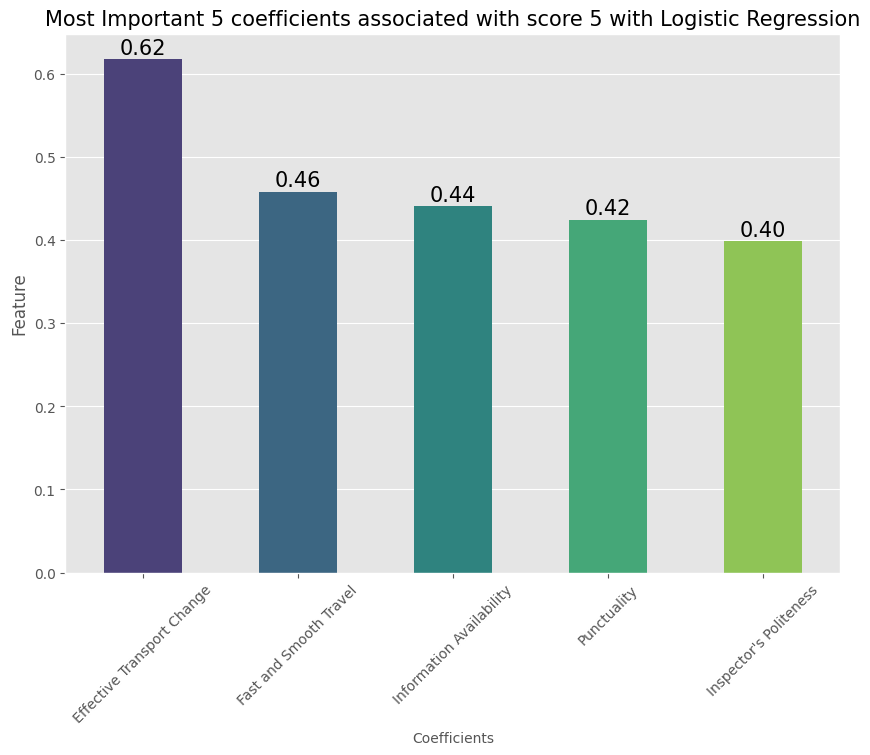

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


coefficients = softmax_reg.coef_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[4]})
top_n = 5

feature_name_mapping = {
    "K2A4": "Effective Transport Change",
    "K2A3": "Fast and Smooth Travel",
    "K3A1": "Information Availability",
    "K3A2": "Inspector's Politeness",
    "K1A1": "Driver's Friendliness",
    "K1A4": "Punctuality",
    "K2A6": "Waiting Platforms Condition",
}

# Apply the mapping to rename the features in your DataFrame
feature_importance_df['Feature'] = feature_importance_df['Feature'].map(feature_name_mapping).fillna(feature_importance_df['Feature'])
top_features = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index).head(top_n)
plt.style.use("ggplot")

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Feature', y='Coefficient', data=top_features, palette='viridis',width=0.5)
plt.title(f'Most Important {top_n} coefficients associated with score 5 with Logistic Regression',fontsize=15)
plt.xlabel('Coefficients',fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Feature')
# plt.axis("off")

for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=45)
plt.show()

### Random Forest Multiclassification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = hsl
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2, shuffle=True, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))

# Optionally, you can also examine feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))

Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.45      0.15      0.22       503
           1       0.35      0.06      0.10      1835
           2       0.52      0.23      0.32     15137
           3       0.71      0.90      0.80     79783
           4       0.64      0.38      0.48     27438

    accuracy                           0.69    124696
   macro avg       0.54      0.34      0.38    124696
weighted avg       0.67      0.69      0.66    124696

                       Feature  Importance
21                   Boardings    0.093994
17              Bus/car number    0.093795
26  Maximum temperature (degC)    0.089134
27  Minimum temperature (degC)    0.088983
24   Precipitation amount (mm)    0.052551
9                         K2A4    0.039861
14                         T71    0.039445
3                         K1A4    0.038974
8                         K2A3    0.034362
0                         K1A1    0.033873
22                 Prof

<ipython-input-148-7c1af0c5c061>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  feature_importances["Feature"] = feature_importances["Feature"].str.replace(
<ipython-input-148-7c1af0c5c061>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  ).str.replace(
<ipython-input-148-7c1af0c5c061>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  ).str.replace(


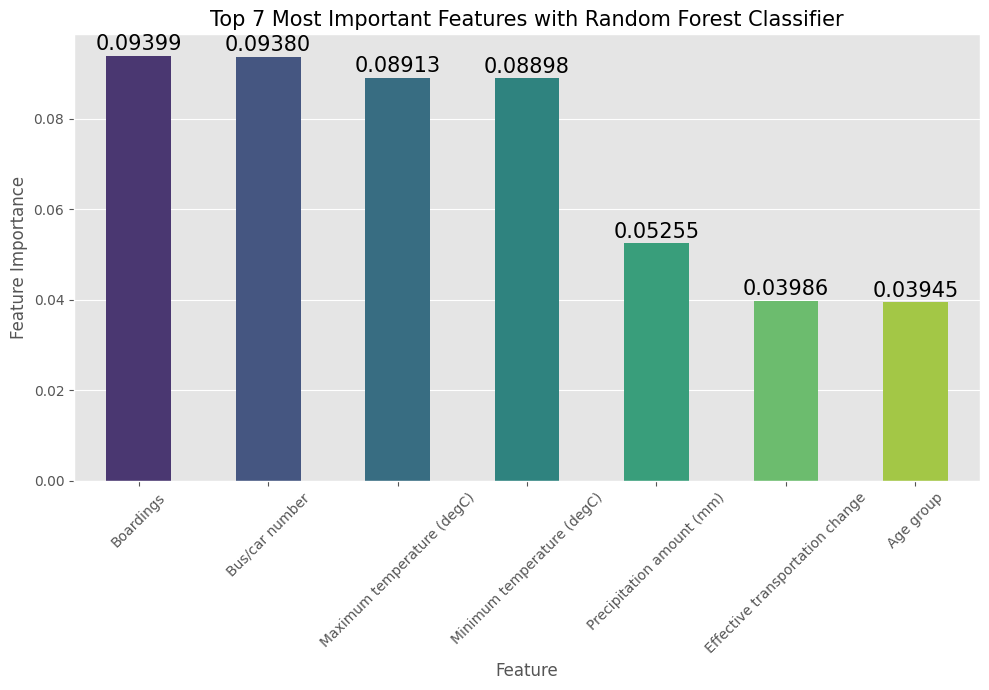

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
top_n = 7
feature_importances["Feature"] = feature_importances["Feature"].str.replace(
    "Maximum temperature (degC)", "Maximum temperature"
).str.replace(
    "Minimum temperature (degC)", "Minimum temperature"
).str.replace(
    "Precipitation amount (mm)", "Precipitation amount"
).str.replace(
    "K2A4", "Effective transportation change"
).str.replace(
    "T71", "Age group"
)

feature_importances
top_features = feature_importances.head(top_n)

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Feature', y='Importance', data=top_features, palette='viridis',width=0.5)
plt.title(f'Top {top_n} Most Important Features with Random Forest Classifier',fontsize=15)
# plt.xlabel('Feature')
plt.xticks(fontsize=10)
plt.ylabel('Feature Importance')

for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.5f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


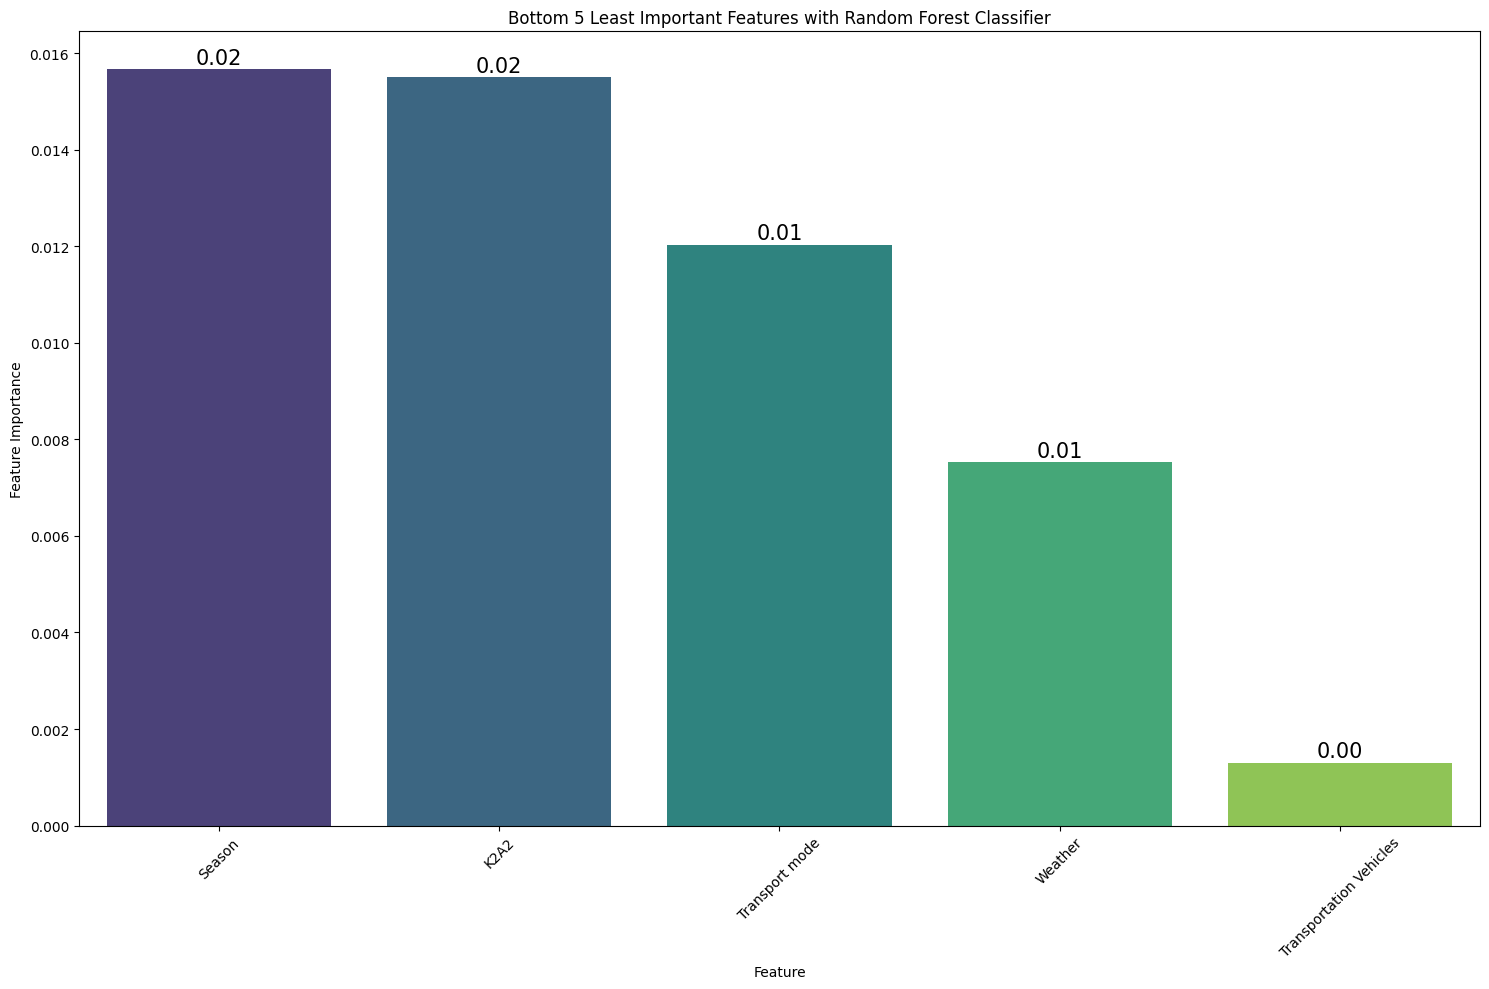

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already sorted feature_importances in ascending order
bottom_n = 5
bottom_features = feature_importances.tail(bottom_n)

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Feature', y='Importance', data=bottom_features, palette='viridis')
plt.title(f'Bottom {bottom_n} Least Important Features with Random Forest Classifier')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Logistic Regression using PCA

In [ ]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 5
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_selected = X_pca[:, :n_components]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_data, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(confusion_mat)

from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6458988259446975
Precision: 0.590759438750381
Recall: 0.6458988259446975
F1-Score: 0.5363275835564774
Confusion Matrix:
[[    0     0   172   326     5]
 [    0     0   161  1670     4]
 [    0     0   353 14739    45]
 [    0     0   798 78076   909]
 [    0     0   438 24888  2112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       503
           1       0.00      0.00      0.00      1835
           2       0.18      0.02      0.04     15137
           3       0.65      0.98      0.78     79783
           4       0.69      0.08      0.14     27438

    accuracy                           0.65    124696
   macro avg       0.30      0.22      0.19    124696
weighted avg       0.59      0.65      0.54    124696



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.15848099 0.10317529 0.09569617 0.07286114 0.05862889]


### Logistic classification with undersampling --> basically gives chance results

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2, shuffle=True, random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

scaler = StandardScaler()
scaler.fit(X_train_undersampled)
X_train = scaler.fit_transform(X_train_undersampled)
X_test = scaler.transform(X_test)
y_train_undersampled = y_train_undersampled.values.ravel()
y_test = y_test.values.ravel()

softmax_reg = LogisticRegression(
    multi_class='multinomial', solver='sag', max_iter=100)
softmax_reg.fit(X_train_undersampled, y_train_undersampled)
y_pred = softmax_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(confusion_mat)

from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accuracy: 0.23060884070058382
Precision: 0.5269767715365526
Recall: 0.23060884070058382
F1-Score: 0.18980184504574305
Confusion Matrix:
[[  402     8    28    10    55]
 [ 1041   112   239    91   352]
 [ 4910   724  2859  1148  5496]
 [12557  2641 12393  5562 46630]
 [ 2778   603  3096  1140 19821]]
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.80      0.04       503
           1       0.03      0.06      0.04      1835
           2       0.15      0.19      0.17     15137
           3       0.70      0.07      0.13     79783
           4       0.27      0.72      0.40     27438

    accuracy                           0.23    124696
   macro avg       0.23      0.37      0.15    124696
weighted avg       0.53      0.23      0.19    124696



### Random Oversampling for logistic classification

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2, shuffle=True, random_state=42)
# Create a RandomOverSampler instance
oversampler = RandomOverSampler(random_state=42)

# Perform random oversampling on the training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Standardize the oversampled training data
scaler = StandardScaler()
scaler.fit(X_train_oversampled)
X_train_oversampled = scaler.transform(X_train_oversampled)
X_test = scaler.transform(X_test)

# Create and train the Logistic Regression model on the oversampled data
softmax_reg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=100)
softmax_reg.fit(X_train_oversampled, y_train_oversampled)

# Make predictions
y_pred = softmax_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(confusion_mat)

# Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.4117934817476102
Precision: 0.5996228484734748
Recall: 0.4117934817476102
F1-Score: 0.43592471764052954
Confusion Matrix:
[[  314    98    37    23    31]
 [  589   567   370   171   138]
 [ 1727  3195  5163  3228  1824]
 [ 2788  6526 14483 26056 29930]
 [  748  1124  1557  4760 19249]]
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.62      0.09       503
           1       0.05      0.31      0.08      1835
           2       0.24      0.34      0.28     15137
           3       0.76      0.33      0.46     79783
           4       0.38      0.70      0.49     27438

    accuracy                           0.41    124696
   macro avg       0.30      0.46      0.28    124696
weighted avg       0.60      0.41      0.44    124696



### Logistic Regression with SMOTE oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Standardize the oversampled training data
scaler = StandardScaler()
scaler.fit(X_train_oversampled)
X_train_oversampled = scaler.transform(X_train_oversampled)
X_test = scaler.transform(X_test)

# Create and train the Logistic Regression model on the oversampled data
softmax_reg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=100)
softmax_reg.fit(X_train_oversampled, y_train_oversampled)

# Make predictions
y_pred = softmax_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(confusion_mat)

# Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


### Multiclassification in deep learning

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
X = hsl.values
y = y_data.values.ravel()

X = torch.from_numpy(X)
X = X.to(torch.float32)
y = torch.from_numpy(y)
y = y.to(torch.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)
y_train = y_train.to(torch.long)
y_test = y_test.to(torch.long)
y_train.dtype, y_test.dtype

(torch.int64, torch.int64)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)
y_train[:5]

tensor([3, 3, 1, 3, 3])

In [ ]:
class softmax(nn.Module):
    def __init__(self, input_size=29, num_classes=5):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes),
        )


    def forward(self, x):
        return self.linear_layer_stack(x)

In [ ]:
model = softmax()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
def accuracy_fn(y_true, y_pred):
    # torch.eq() calculates where two tensors are equal
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
    # Training
    model.train()

    # 1. Forward pass
    y_logits = model(X_train)  # model outputs raw logits
    # go from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Testing
    model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        # 2. Calculate test loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(
            f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 232.69989, Acc: 10.04% | Test Loss: 766.02399, Test Acc: 65.29%
Epoch: 10 | Loss: 179.85645, Acc: 60.14% | Test Loss: 111.42403, Test Acc: 53.96%
Epoch: 20 | Loss: 87.44473, Acc: 29.80% | Test Loss: 88.89922, Test Acc: 65.29%
Epoch: 30 | Loss: 18.90623, Acc: 30.64% | Test Loss: 41.32437, Test Acc: 25.12%
Epoch: 40 | Loss: 33.12198, Acc: 65.22% | Test Loss: 28.92534, Test Acc: 65.25%
Epoch: 50 | Loss: 8.69914, Acc: 65.03% | Test Loss: 5.50923, Test Acc: 56.74%
Epoch: 60 | Loss: 13.91787, Acc: 65.22% | Test Loss: 10.71704, Test Acc: 65.29%
Epoch: 70 | Loss: 6.11122, Acc: 64.06% | Test Loss: 4.48445, Test Acc: 64.10%
Epoch: 80 | Loss: 5.73693, Acc: 34.48% | Test Loss: 5.08242, Test Acc: 34.79%
Epoch: 90 | Loss: 2.20488, Acc: 65.14% | Test Loss: 2.40902, Test Acc: 65.30%


## TODO

In [ ]:
# TODO: Evaluate the result

# TODO: Cross validation

# TODO: Baseline

# TODO: Try other algorithms (Softmax, random forest classification)

# TODO: Low the loss


In [ ]:
# TODO: The smallest 5 factors - find out ways to make some informative charts

